## UBER FARE PREDICTION

## Importing Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import radians, sin, cos, asin, sqrt

## Data Pre-processing

In [2]:
df = pd.read_csv('Train.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [3]:
# REMOVING COLUMNS
    # Removing Inappropriate Columns    
df.drop(labels='Unnamed: 0',axis=1,inplace=True)
df.drop(labels='key',axis=1,inplace=True)
df.drop(labels='pickup_datetime',axis=1,inplace=True)
    # Dropped all the rows having any missing value:
df.dropna(inplace=True)

# Removing Outliers
    # Removing negative and 0 values from 'fare_amount' column:
tempdf = df[df['fare_amount'] <= 0]
df.drop(tempdf.index,inplace = True)

    # Removing negative and 0 values from 'passenger_count' column:
tempdf2 = df[df['passenger_count'] <= 0]
df.drop(tempdf2.index,inplace = True)

    # Removing values greater than 7 from the 'passenger_count' column:
tempdf3 = df[df['passenger_count'] > 7]
df.drop(tempdf3.index,inplace = True)

#Eliminate rows where the pickup and drop location points are same
df=df[np.logical_or(df['pickup_longitude'] != df['dropoff_longitude'],df['pickup_latitude'] != df['dropoff_latitude'])]

#Retriving starting(longitude,latitude) and ending(longitude,latitude) in an array
dim=df.iloc[:,1:5].values

#droping starting(longitude,latitude) and ending(longitude,latitude)
df.drop('pickup_longitude',axis=1,inplace=True)
df.drop('pickup_latitude',axis=1,inplace=True)
df.drop('dropoff_longitude',axis=1,inplace=True)
df.drop('dropoff_latitude',axis=1,inplace=True)

#Calculating Distance from starting(longitude,latitude) and ending(longitude,latitude)
def distance(lat1, lat2, lon1, lon2):
     
    # The math module contains a function named
    # radians which converts from degrees to radians.
    lon1 = radians(lon1)
    lon2 = radians(lon2)
    lat1 = radians(lat1)
    lat2 = radians(lat2)
      
    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
 
    c = 2 * asin(sqrt(a))
    
    # Radius of earth in kilometers. Use 3956 for miles
    r = 6371
      
    # calculate the result
    return(c * r)


dist=[]

# Populating the array "dist"
for lon1,lat1,lon2,lat2 in dim:
    d=distance(lat1, lat2, lon1, lon2)
    dist.append(d)
    
# Concating the array "dist" as a column of df:
df['Distance']=dist

C:\Users\Aditya\AppData\Local\Temp\ipykernel_13160\3996506268.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pickup_longitude',axis=1,inplace=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_13160\3996506268.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('pickup_latitude',axis=1,inplace=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_13160\3996506268.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [4]:
# Creating a series "tempdf4"(temporary dataframe 4) for the distances greater than 100 km:
tempdf4=df[df['Distance']>100]
    # Removing them from original dataframe
df.drop(tempdf4.index,inplace=True)

# Creating a series "tempdf5"(temporary dataframe 5) for the distances lesser than 1 km:
tempdf5=df[df['Distance']<1]
    # Removing them from original dataframe
df.drop(tempdf5.index,inplace=True)

C:\Users\Aditya\AppData\Local\Temp\ipykernel_13160\310201253.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(tempdf4.index,inplace=True)
C:\Users\Aditya\AppData\Local\Temp\ipykernel_13160\310201253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(tempdf5.index,inplace=True)


In [5]:
df.Distance.min()
# NOW BASICALLY "DF" ONLY HAVE THE VALUES WHERE THE DISTANCE IS BETWEEN 1 TO 100 KM

1.0000359486047088

In [6]:
df.sort_values(by='Distance',ascending= False)

,fare_amount,passenger_count,Distance
97989,5.30,4,99.162509
186417,13.70,2,99.080212
174237,5.30,1,98.705066
79244,49.57,1,98.364525
101692,27.70,1,98.070305
...,...,...,...
87482,6.90,1,1.000093
128385,4.50,4,1.000090
128441,8.00,1,1.000058
56493,5.30,1,1.000051


<AxesSubplot:xlabel='Distance', ylabel='fare_amount'>

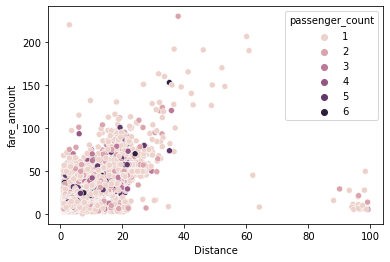

In [7]:
sns.scatterplot(x='Distance',y='fare_amount',hue='passenger_count',data=df)

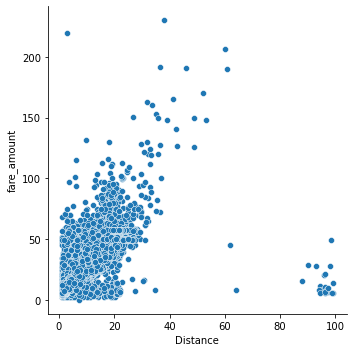

In [8]:
#distance vs fare
sns.relplot(x='Distance',y='fare_amount',data=df)

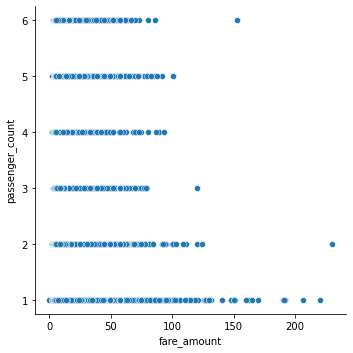

In [9]:
#passenger count vs fare
sns.relplot(x='fare_amount',y='passenger_count',data=df)

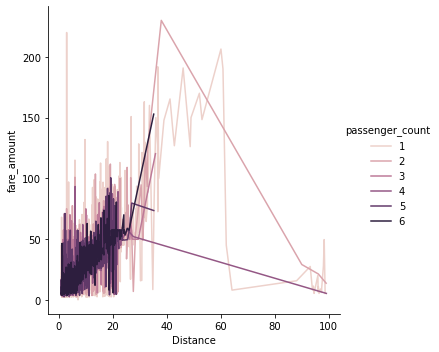

In [10]:
# Distance vs Fare
sns.relplot(x='Distance',y='fare_amount',data=df,hue='passenger_count',kind="line")

## Splitting Data

In [11]:
# X = (all rows) , ("passanger_count" + "Distance")
    # These are the features for our model
X = df.iloc[:,1:].values
# Y = (all rows) , ("fare_amount")
    # It is the target column
Y = df.iloc[:,0].values
X_train, X_test, Y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

## Training Data 

In [12]:
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=10)
rfrmodel.fit(X_train,Y_train)

RandomForestRegressor(random_state=10)

In [13]:
pred=rfrmodel.predict(X_train)

In [14]:
pd.DataFrame(pred)

,0
0,49.5122
1,9.1850
2,8.1250
3,10.6640
4,8.1890
...,...
122277,9.6560
122278,14.5070
122279,8.8280
122280,10.3640


## Predicting model accuracy

In [15]:
# Y predicted:
pred = rfrmodel.predict(X_train)
# RMSE:
rmse = np.sqrt(mean_squared_error(Y_train,pred))
# MAPE:
mape = mean_absolute_percentage_error(Y_train,pred, sample_weight=None, multioutput='uniform_average')

In [16]:
# Displaying the model Accuracy:
accu = {"Accuracy Parameter":["Root Mean Squared Error","Mean Absolute Percentage Error"], "Value":[rmse,mape]}
display(pd.DataFrame(accu))

,Accuracy Parameter,Value
0,Root Mean Squared Error,1.842054
1,Mean Absolute Percentage Error,0.094658
